<a href="https://colab.research.google.com/github/eeuunnjjiii/Project/blob/main/%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터 전처리

##1) 파일 불러오기

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv('/gdrive/My Drive/vgames2.csv', index_col=0)
print(raw_data.info())
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [4]:
raw_data.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


##2) 결측치 처리

1. 결측치 비율 / 방법 (by hair et al.(2006))
- 10% 미만 / 제거 or 어떠한 방법이든지 상관없이 Imputation
- 10% 이상 20% 미만 / hot deck , regression , model based method
- 20% 이상 / model based method , regression

In [5]:
raw_data.shape

(16598, 9)

In [6]:
raw_data.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
print(round(raw_data.isna().sum().sum()/raw_data.shape[0]*100,2),'%') 
#결측치가 전체의 2%이므로 drop 하기로 결정

2.28 %


In [8]:
raw_data=raw_data.dropna()
raw_data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


##3) 데이터 수정

In [9]:
data=raw_data.copy()

In [10]:
data.shape

(16241, 9)

In [11]:
#Year 데이터 값 수정 (80이하는 2000년대로, 80이상은 1900년대로)

data_year=np.array(data['Year'])

for i in range(len(data_year)):
  if data_year[i]<=80:
    data_year[i]=data_year[i]+2000
  elif 80<data_year[i]<=99:
    data_year[i]=data_year[i]+1900
  else:
    continue

data['Year']=data_year

In [12]:
#Sales 데이터 값 수정
#K=1,000 M=1,000,000

#K,M 문자열 처리
data_na=np.array(data['NA_Sales'])

for i in range(len(data_na)):
  if 'M' in data_na[i]:
    data_na[i]=data_na[i].replace('M','')
  elif 'K' in data_na[i]:
    data_na[i]=data_na[i].replace('K','')
    data_na[i]=float(data_na[i])*0.001
  else:
    continue

data['NA_Sales']=data_na

In [13]:
data_eu=np.array(data['EU_Sales'])

for i in range(len(data_eu)):
  if 'M' in data_eu[i]:
    data_eu[i]=data_eu[i].replace('M','')
  elif 'K' in data_eu[i]:
    data_eu[i]=data_eu[i].replace('K','')
    data_eu[i]=float(data_eu[i])*0.001
  else:
    continue

data['EU_Sales']=data_eu

In [14]:
data_jp=np.array(data['JP_Sales'])

for i in range(len(data_jp)):
  if 'M' in data_jp[i]:
    data_jp[i]=data_jp[i].replace('M','')
  elif 'K' in data_jp[i]:
    data_jp[i]=data_jp[i].replace('K','')
    data_jp[i]=float(data_jp[i])*0.001
  else:
    continue

data['JP_Sales']=data_jp

In [15]:
data_ot=np.array(data['Other_Sales'])

for i in range(len(data_ot)):
  if 'M' in data_ot[i]:
    data_ot[i]=data_ot[i].replace('M','')
  elif 'K' in data_ot[i]:
    data_ot[i]=data_ot[i].replace('K','')
    data_ot[i]=float(data_ot[i])*0.001
  else:
    continue

data['Other_Sales']=data_ot

In [16]:
#Sales 데이터 타입 변경(str to float)
data['NA_Sales']=data['NA_Sales'].astype(float)
data['EU_Sales']=data['EU_Sales'].astype(float)
data['JP_Sales']=data['JP_Sales'].astype(float)
data['Other_Sales']=data['Other_Sales'].astype(float)

In [17]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB
None


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [18]:
#중복값 확인
data.duplicated().sum()

0

##4) 추가 데이터 생성

In [19]:
#세일즈 합계 데이터 생성
data['Total']=data['NA_Sales']+data['EU_Sales']+data['JP_Sales']+data['Other_Sales']

In [20]:
data.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.0,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.0,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.0,0.02,0.00,0.02


##5) 기본 상관관계 분석

In [21]:
#판매량 상관관계 분석
data_corr=data.corr().drop('Year',axis=0).drop('Year',axis=1)
data_corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
NA_Sales,1.000000,0.768906,0.449358,0.634707,0.941656
EU_Sales,0.768906,1.000000,0.432350,0.728084,0.903205
JP_Sales,0.449358,0.432350,1.000000,0.285395,0.609213
Other_Sales,0.634707,0.728084,0.285395,1.000000,0.748166
Total,0.941656,0.903205,0.609213,0.748166,1.000000


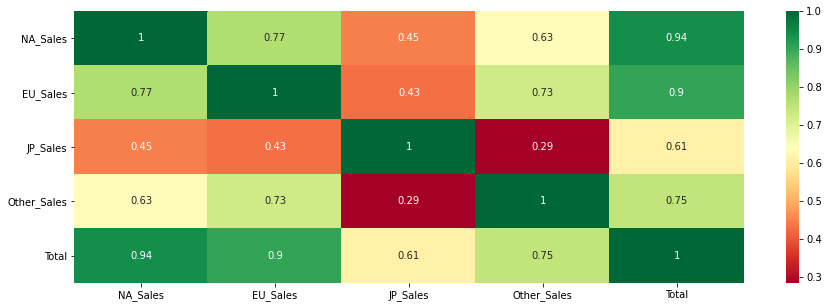

In [22]:
#판매량 상관관계 시각화
plt.figure(figsize=(15,5))
sns.heatmap(data_corr,annot=True,cmap="RdYlGn")
plt.show()

- 1에 가까울수록 양의 상관관계를 나타내는데, 전 세계 판매량에는 북미 시장이 가장 큰 영향을 미치는 것을 알 수 있다.

#2. 데이터 분석

##2.1 지역에 따라 선호하는 게임 장르가 다를까?

In [23]:
#필요한 데이터만 따로 생성
genre=data[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']]
genre.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
1,Action,0.04,0.00,0.00,0.00,0.04
2,Action,0.17,0.00,0.00,0.01,0.18
3,Adventure,0.00,0.00,0.02,0.00,0.02
4,Misc,0.04,0.00,0.00,0.00,0.04
5,Platform,0.12,0.09,0.00,0.04,0.25


In [24]:
#Grouped by Genre
genre=genre.groupby('Genre')
genre

In [25]:
#Total Sales by Genre
genre_sum=genre.sum()

###1) 통계적 분석
**가설설정**
- Ho : 지역에 따라 선호하는 게임 장르가 모두 같다.

- Ha : 지역에 따라 선호하는 게임 장르가 모두 같지 않다.

In [26]:
#독립표본이 4개이므로 ANOVA(일원분산분석) 사용
from scipy.stats import f_oneway
f_oneway(genre_sum['NA_Sales'],genre_sum['EU_Sales'],genre_sum['JP_Sales'],genre_sum['Other_Sales'])

F_onewayResult(statistic=9.050217142562778, pvalue=8.797574909911202e-05)

>ANOVA 결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 : 지역에 따라 선호하는 게임 장르가 모두 같지 않다.

###2) 지역별로 선호하는 게임 장르는 무엇인가?

In [27]:
#Popular Genre in North America
genre_NA=genre_sum.sort_values(by='NA_Sales', ascending=False).iloc[:,0]
#Popular Genre in Europe 
genre_EU=genre_sum.sort_values(by='EU_Sales', ascending=False).iloc[:,1]
#Popular Genre in Japan 
genre_JP=genre_sum.sort_values(by='JP_Sales', ascending=False).iloc[:,2]
#Popular Genre in Other countries 
genre_ot=genre_sum.sort_values(by='Other_Sales', ascending=False).iloc[:,3]
#Global Popular Genre
genre_gl=genre_sum.sort_values(by='Total', ascending=False).iloc[:,4]

In [28]:
#지역별 선호하는 장르 순위
pd.DataFrame({'Na':genre_NA.index,'EU':genre_EU.index,'JP':genre_JP.index,'Other':genre_ot.index,'Global':genre_gl.index})

,Na,EU,JP,Other,Global
0,Action,Action,Role-Playing,Action,Action
1,Sports,Sports,Action,Sports,Sports
2,Shooter,Shooter,Sports,Shooter,Shooter
3,Platform,Racing,Platform,Racing,Role-Playing
4,Misc,Misc,Misc,Misc,Platform
5,Racing,Platform,Fighting,Role-Playing,Misc
6,Role-Playing,Role-Playing,Simulation,Platform,Racing
7,Fighting,Simulation,Racing,Fighting,Fighting
8,Simulation,Fighting,Puzzle,Simulation,Simulation
9,Puzzle,Adventure,Adventure,Adventure,Puzzle


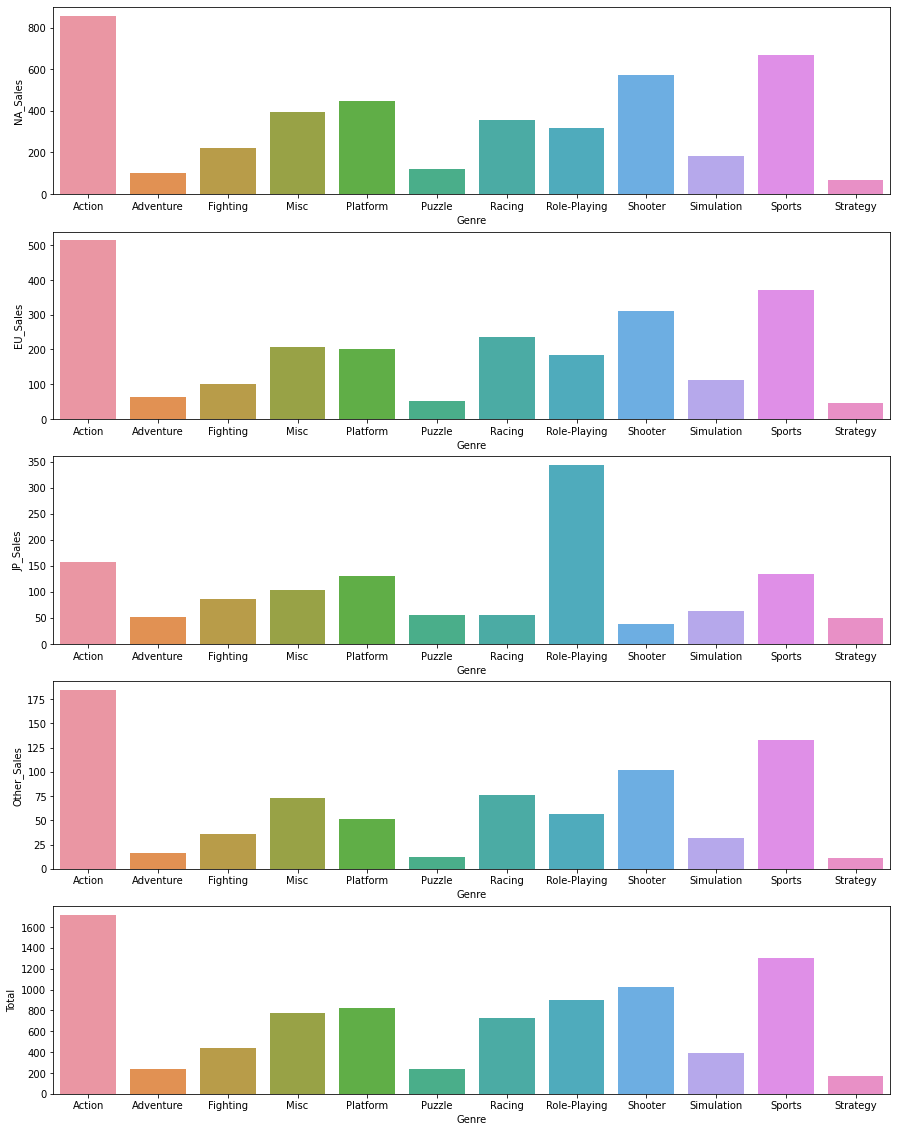

In [29]:
#지역별 선호하는 장르 시각화
genre_s=genre_sum.reset_index()
fig, ax=plt.subplots(5,1, figsize=(15,20))
sns.barplot(x='Genre',y='NA_Sales',data=genre_s,ax=ax[0])
sns.barplot(x='Genre',y='EU_Sales',data=genre_s,ax=ax[1])
sns.barplot(x='Genre',y='JP_Sales',data=genre_s,ax=ax[2])
sns.barplot(x='Genre',y='Other_Sales',data=genre_s,ax=ax[3])
sns.barplot(x='Genre',y='Total',data=genre_s,ax=ax[4]);

In [30]:
#전 세계적으로 인기있는 장르의 비중
print('Action by total',':',round(genre_sum.loc['Action'].sum()/genre_sum.sum().sum()*100),'%')
print('Sports by total',':',round(genre_sum.loc['Sports'].sum()/genre_sum.sum().sum()*100),'%')
print('Shooter by total',':',round(genre_sum.loc['Shooter'].sum()/genre_sum.sum().sum()*100),'%')

Action by total : 20 %
Sports by total : 15 %
Shooter by total : 12 %


1-1) 전 세계적으로 인기있는 장르의 대표 게임은?

In [31]:
#Name 넣어 추가 생성
name=data[['Name','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total']]
grouped=name.groupby('Genre')
grouped

In [32]:
#Genre별 게임 명 추출(Total 기준 내림차순)
for key, group in grouped:
  print("* key",key)
  print("* count",len(group))
  print(group.sort_values(by='Total', ascending=False))
  print('\n')

* key Action
* count 3240
                                                  Name  ...  Total
3484                                Grand Theft Auto V  ...  21.39
14670                    Grand Theft Auto: San Andreas  ...  20.81
10914                               Grand Theft Auto V  ...  16.38
5341                       Grand Theft Auto: Vice City  ...  16.15
9787                              Grand Theft Auto III  ...  13.10
...                                                ...  ...    ...
331    Katekyoo Hitman Reborn! Kindan no Yami no Delta  ...   0.01
2189                                     The Wild West  ...   0.01
7253                   The Amazing Spider-Man 2 (2014)  ...   0.01
7251                                 Fallout Anthology  ...   0.01
12994         Hi Hi Puffy AmiYumi: The Genie & the Amp  ...   0.01

[3240 rows x 7 columns]


* key Adventure
* count 1268
                                        Name      Genre  ...  Other_Sales  Total
6848      Super Mario Land 2: 6 G

###*** 전 세계적으로 인기있는 장르의 대표 게임**
1. Action(20%) : Grand Theft Auto V (21.39M$)

2. Sports(15%) : Wii Sports (82.74M$)

3. Shooter(12%) : Duck Hunt (28.31M$)


##2.2 연도별 게임의 트렌드가 있을까?
###- 흐름을 보기 위해 10년 단위로 분석

In [33]:
#10년 단위 구간화 (1980-2017)
#2018년, 19년 데이터가 존재하지 않고, 2020년 데이터는 1개이므로 2017년까지 분석
data['Year_N']=pd.cut(data['Year'],bins=[0,1989,1999,2009,2019],labels=[1980,1990,2000,2010])

In [34]:
data.tail(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79,2010
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38,2010
16598,The King of Fighters '95,PS,1996.0,Fighting,Sony Computer Entertainment,0.00,0.00,0.16,0.01,0.17,1990


###2.2.1 연도별 게임 장르의 트렌드

In [35]:
#10년 단위 Genre&Total Pivot
years=pd.pivot_table(data,index=['Genre'],columns=['Year_N'],values='Total',aggfunc='sum',fill_value=0)
years

Year_N,1980,1990,2000,2010
Genre,,,,
Action,51.10,139.15,853.13,669.60
Adventure,4.78,44.80,123.59,60.85
Fighting,7.24,123.51,231.26,81.53
Misc,8.44,63.43,478.53,229.30
Platform,122.26,208.87,376.13,120.73
Puzzle,62.75,38.94,117.86,21.18
Racing,12.10,148.81,438.00,123.64
Role-Playing,15.25,182.77,412.20,291.29
Shooter,59.77,68.89,433.45,462.64


In [36]:
#pivot to dataframe
genre_year=pd.DataFrame(years,columns=[1980,1990,2000,2010,2020]).drop(2020,axis=1)
genre_year.head()

Year_N,1980,1990,2000,2010
Genre,,,,
Action,51.10,139.15,853.13,669.60
Adventure,4.78,44.80,123.59,60.85
Fighting,7.24,123.51,231.26,81.53
Misc,8.44,63.43,478.53,229.30
Platform,122.26,208.87,376.13,120.73


###1) 통계적 분석
**가설설정**
- Ho : 연도에 따라 유행하는 게임 장르가 모두 같다.

- Ha : 연도에 따라 유행하는 게임 장르가 모두 같지 않다.

In [37]:
from scipy.stats import f_oneway
f_oneway(genre_year[1980],genre_year[1990],genre_year[2000],genre_year[2010])

F_onewayResult(statistic=10.566994551157226, pvalue=2.345520976854795e-05)

>ANOVA 결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 : 연도에 따라 유행하는 게임 장르가 모두 같지 않다.
###= 연도별 게임 장르의 트렌드가 있다.

###2) 연도별 게임 장르의 트렌드는 무엇인가?

In [38]:
#Popular Genre in 1980
genre_1980=genre_year.sort_values(by=1980, ascending=False).iloc[:,0]
#Popular Genre in 1990
genre_1990=genre_year.sort_values(by=1990, ascending=False).iloc[:,1]
#Popular Genre in 2000
genre_2000=genre_year.sort_values(by=2000, ascending=False).iloc[:,2]
#Popular Genre in 2010
genre_2010=genre_year.sort_values(by=2010, ascending=False).iloc[:,3]

In [39]:
#연도별 선호하는 장르 순위
pd.DataFrame({'1980':genre_1980.index,'1990':genre_1990.index,'2000':genre_2000.index,'2010':genre_2010.index})

,1980,1990,2000,2010
0,Platform,Platform,Action,Action
1,Puzzle,Role-Playing,Sports,Shooter
2,Shooter,Racing,Misc,Sports
3,Action,Sports,Racing,Role-Playing
4,Sports,Action,Shooter,Misc
5,Role-Playing,Fighting,Role-Playing,Racing
6,Racing,Shooter,Platform,Platform
7,Misc,Misc,Simulation,Fighting
8,Fighting,Strategy,Fighting,Simulation
9,Adventure,Simulation,Adventure,Adventure


- 시각화

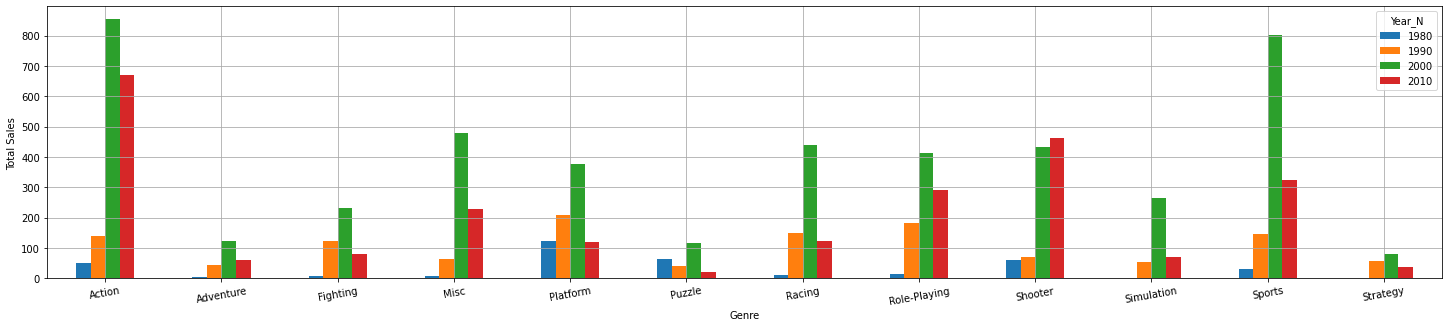

In [40]:
ax=genre_year.plot(kind='bar',figsize=(25,5))
ax.set_ylabel('Total Sales')
plt.grid(color='darkgray')
plt.xticks(rotation=10)
plt.show()

In [41]:
#단위 표준화 진행
from sklearn.preprocessing import StandardScaler,Normalizer

scaler=StandardScaler()
Z=scaler.fit_transform(genre_year)

In [42]:
visual=pd.DataFrame(Z,columns=genre_year.columns,index=genre_year.index)
visual.head(3)

Year_N,1980,1990,2000,2010
Genre,,,,
Action,0.562436,0.584015,1.970431,2.427429
Adventure,-0.755431,-1.091618,-1.096177,-0.771218
Fighting,-0.685440,0.306252,-0.643588,-0.662556


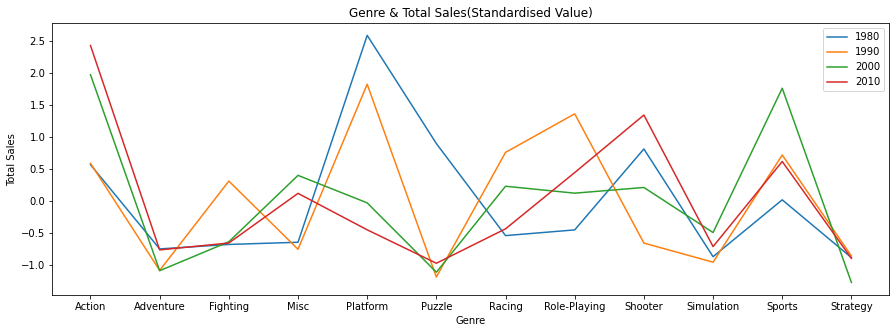

In [43]:
plt.figure(figsize=(15,5))
plt.plot(visual)
plt.xlabel("Genre")
plt.ylabel("Total Sales")
plt.title("Genre & Total Sales(Standardised Value)")
plt.legend(visual.columns);

###2.2.2 연도별 게임 플랫폼의 트렌드

In [44]:
pf=pd.pivot_table(data,index=['Platform'],columns=['Year_N'],values='Total',aggfunc='sum',fill_value=0)
pf_year=pd.DataFrame(pf,columns=[1980,1990,2000,2010,2020])
pf_year=pf_year.drop(2020,axis=1)
pf_year.head(3)

Year_N,1980,1990,2000,2010
Platform,,,,
2600,85.98,0.0,0.0,0.00
3DO,0.00,0.1,0.0,0.00
3DS,0.00,0.0,0.0,231.82


###1) 통계적 분석
**가설설정**
- Ho : 연도에 따라 유행하는 게임 플랫폼이 모두 같다.

- Ha : 연도에 따라 유행하는 게임 플랫폼이 모두 같지 않다.

In [45]:
f_oneway(pf_year[1980],pf_year[1990],pf_year[2000],pf_year[2010])

F_onewayResult(statistic=3.769777265367656, pvalue=0.012552349358641768)

>ANOVA 결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 : 연도에 따라 유행하는 게임 플랫폼이 모두 같지 않다.
###= 연도별 게임 플랫폼의 트렌드가 있다.

###2) 연도별 게임 플랫폼의 트렌드는 무엇인가?

In [46]:
#Popular Platform in 1980
pf_1980=pf_year.sort_values(by=1980, ascending=False).iloc[:,0]
#Popular Platform in 1990
pf_1990=pf_year.sort_values(by=1990, ascending=False).iloc[:,1]
#Popular Platform in 2000
pf_2000=pf_year.sort_values(by=2000, ascending=False).iloc[:,2]
#Popular Platform in 2010
pf_2010=pf_year.sort_values(by=2010, ascending=False).iloc[:,3]

In [47]:
#연도별 선호하는 플랫폼 순위
pd.DataFrame({'1980':pf_1980.index,'1990':pf_1990.index,'2000':pf_2000.index,'2010':pf_2010.index}).head(10)

,1980,1990,2000,2010
0,NES,PS,PS2,PS3
1,2600,SNES,DS,X360
2,GB,N64,Wii,PS4
3,PC,GB,X360,3DS
4,DS,PC,PS3,Wii
5,SNES,SAT,GBA,XOne
6,PSV,GEN,XB,DS
7,SAT,NES,PSP,PC
8,SCD,DC,GC,WiiU
9,WS,SCD,PS,PSP


- 시각화

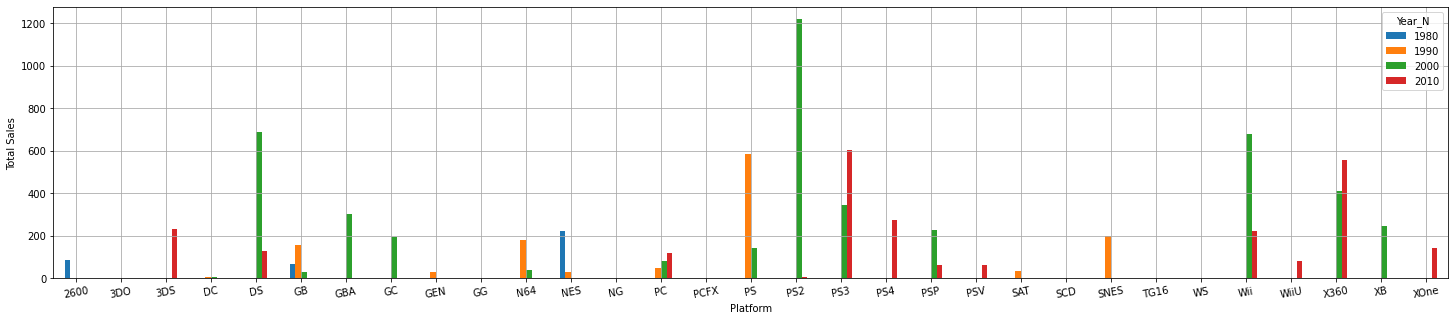

In [48]:
ax=pf_year.plot(kind='bar',figsize=(25,5))
ax.set_ylabel('Total Sales')
plt.grid(color='darkgray')
plt.xticks(rotation=10)
plt.show()

In [49]:
#단위 표준화 진행
from sklearn.preprocessing import StandardScaler,Normalizer

scaler=StandardScaler()
Z1=scaler.fit_transform(pf_year)

In [50]:
visual1=pd.DataFrame(Z1,columns=pf_year.columns,index=pf_year.index)
visual1.head(3)

Year_N,1980,1990,2000,2010
Platform,,,,
2600,1.719292,-0.365808,-0.547733,-0.528928
3DO,-0.282353,-0.364919,-0.547733,-0.528928
3DS,-0.282353,-0.365808,-0.547733,0.996704


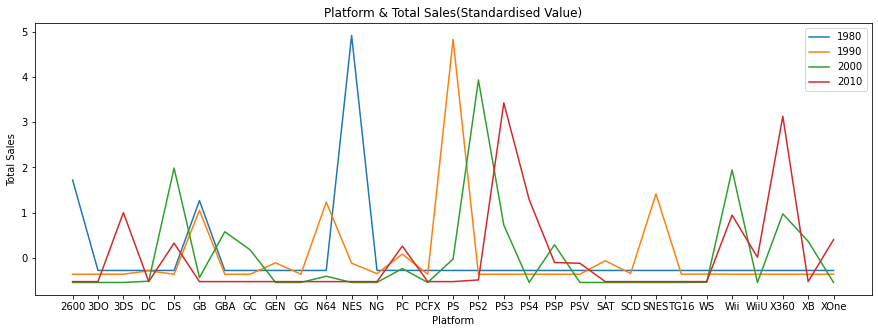

In [51]:
plt.figure(figsize=(15,5))
plt.plot(visual1)
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.title("Platform & Total Sales(Standardised Value)")
plt.legend(visual1.columns);

###2.2.3 연도별 게임 개발사의 트렌드 확인

In [52]:
bf=pd.pivot_table(data,index=['Publisher'],columns=['Year_N'],values='Total',aggfunc='sum',fill_value=0)
bf.head()

Year_N,1980,1990,2000,2010
Publisher,,,,
10TACLE Studios,0.00,0.00,0.11,0.00
1C Company,0.00,0.00,0.01,0.09
20th Century Fox Video Games,1.93,0.00,0.00,0.00
2D Boy,0.00,0.00,0.04,0.00
3DO,0.00,4.53,5.62,0.00


###1) 통계적 분석
**가설설정**
- Ho : 연도에 따라 유행하는 게임 개발사가 모두 같다.

- Ha : 연도에 따라 유행하는 게임 개발사가 모두 같지 않다.

In [53]:
f_oneway(bf[1980],bf[1990],bf[2000],bf[2010])

F_onewayResult(statistic=5.63608917771719, pvalue=0.0007587660415789587)

>ANOVA 결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 : 연도에 따라 유행하는 게임 개발사가 모두 같지 않다.
###= 연도별 게임 개발사의 트렌드가 있다.

###2) 연도별 게임 개발사의 트렌드는 무엇인가?

In [54]:
#Publisher의 경우 수가 너무 많아 연도별 Top 5를 대표로 뽑음
for k in range(0,4):
  print(1980+k*10,':', bf[1980+k*10].sort_values(ascending=False),'\n')

1980 : Publisher
Nintendo              234.89
Atari                  41.26
Activision             17.94
Namco Bandai Games     16.37
Capcom                 11.73
                       ...  
Pack-In-Video           0.00
Panther Software        0.00
Paon                    0.00
Paon Corporation        0.00
10TACLE Studios         0.00
Name: 1980, Length: 575, dtype: float64 

1990 : Publisher
Nintendo                        363.44
Sony Computer Entertainment     171.75
Electronic Arts                  84.93
Konami Digital Entertainment     49.11
Sega                             47.64
                                 ...  
Neko Entertainment                0.00
NetRevo                           0.00
Nexon                             0.00
Nihon Falcom Corporation          0.00
10TACLE Studios                   0.00
Name: 1990, Length: 575, dtype: float64 

2000 : Publisher
Nintendo                       883.00
Electronic Arts                641.86
Activision                     381.12
Son

In [55]:
#연도별 상위 5개 Publisher의 Total Sales
pop_bf=bf.loc[['Atari','Activision','Nintendo','Namco Bandai Games','Capcom','Sony Computer Entertainment','Electronic Arts','Konami Digital Entertainment','Sega','THQ','Ubisoft','Take-Two Interactive']]
pop_bf

Year_N,1980,1990,2000,2010
Publisher,,,,
Atari,41.26,3.74,99.74,1.72
Activision,17.94,25.89,381.12,294.41
Nintendo,234.89,363.44,883.00,278.25
Namco Bandai Games,16.37,32.94,108.20,95.29
Capcom,11.73,32.80,103.06,52.22
Sony Computer Entertainment,0.00,171.75,309.92,121.91
Electronic Arts,0.00,84.93,641.86,360.39
Konami Digital Entertainment,6.77,49.11,167.29,54.72
Sega,0.39,47.64,159.21,62.32


In [56]:
#Popular Publisher in 1980
bf_1980=pop_bf.sort_values(by=1980, ascending=False).iloc[:,0]
#Popular Publisher in 1990
bf_1990=pop_bf.sort_values(by=1990, ascending=False).iloc[:,1]
#Popular Publisher in 2000
bf_2000=pop_bf.sort_values(by=2000, ascending=False).iloc[:,2]
#Popular Publisher in 2010
bf_2010=pop_bf.sort_values(by=2010, ascending=False).iloc[:,3]

In [57]:
#연도별 선호하는 개발사 순위
pd.DataFrame({'1980':bf_1980.index,'1990':bf_1990.index,'2000':bf_2000.index,'2010':bf_2010.index}).head()

,1980,1990,2000,2010
0,Nintendo,Nintendo,Nintendo,Electronic Arts
1,Atari,Sony Computer Entertainment,Electronic Arts,Activision
2,Activision,Electronic Arts,Activision,Nintendo
3,Namco Bandai Games,Konami Digital Entertainment,Sony Computer Entertainment,Ubisoft
4,Capcom,Sega,THQ,Take-Two Interactive


- 시각화

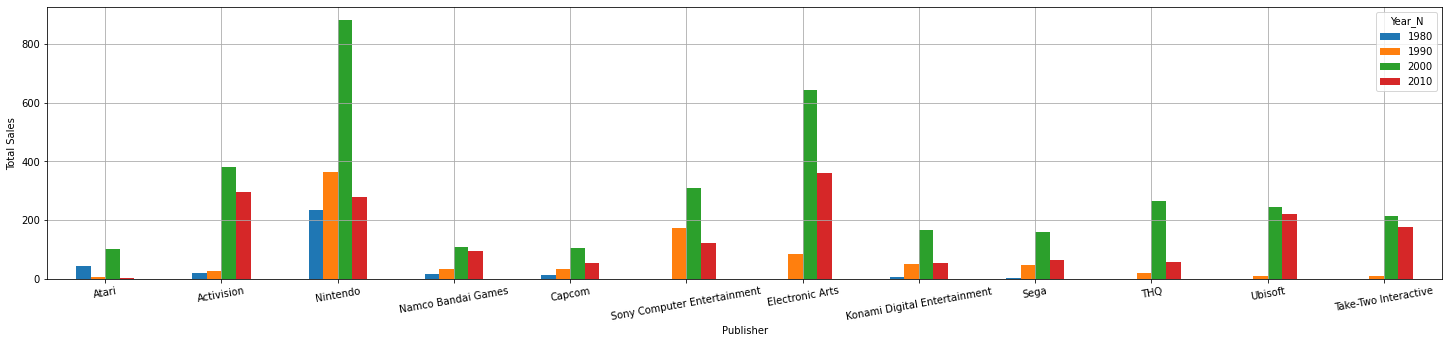

In [58]:
ax=pop_bf.plot(kind='bar',figsize=(25,5))
ax.set_ylabel('Total Sales')
plt.grid(color='darkgray')
plt.xticks(rotation=10)
plt.show()

In [59]:
#단위 표준화 진행
Z2=scaler.fit_transform(pop_bf)

In [60]:
visual2=pd.DataFrame(Z2,columns=pop_bf.columns,index=pop_bf.index)
visual2.head(3)

Year_N,1980,1990,2000,2010
Publisher,,,,
Atari,0.217047,-0.680668,-0.865913,-1.314751
Activision,-0.149355,-0.456007,0.363606,1.320498
Nintendo,3.259342,2.967660,2.556622,1.175001


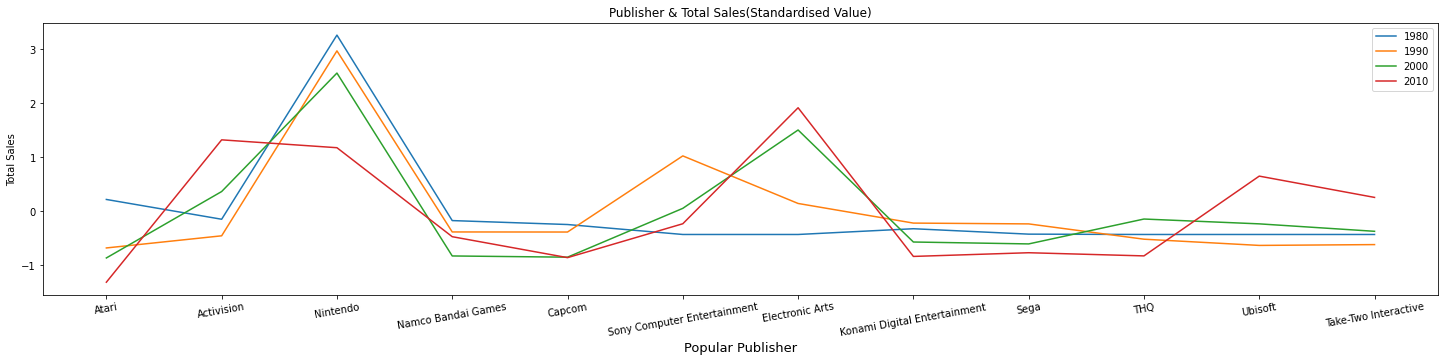

In [61]:
fig,ax=plt.subplots(figsize=(25,5))
plt.plot(visual2)
plt.xlabel("Popular Publisher",size=13)
plt.ylabel("Total Sales")
plt.xticks(rotation=10)
plt.title("Publisher & Total Sales(Standardised Value)")
plt.legend(pop_bf.columns);

##2.3 출고량이 높은 게임에 대한 분석
###- Global Sales Top 100 Games에 대한 분석

In [62]:
#Total sales 상위 100개 데이터
top=data.sort_values(by='Total',ascending=False).head(100)
top=top.reset_index().drop('index',axis=1)
top['Year']=top['Year'].astype(int)
top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,2000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1990
...,...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44,2010
96,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38,2000
97,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34,2010
98,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32,2000


In [63]:
#Name별 전체 판매량
top.groupby('Name').sum().sort_values(by='Total',ascending=False).head(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Name,,,,,,
Wii Sports,2006,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,6040,20.44,20.39,1.39,7.54,49.76
Super Mario Bros.,1985,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,2008,15.85,12.88,3.79,3.31,35.83
Wii Sports Resort,2009,15.75,11.01,3.28,2.96,33.00


In [64]:
#top 100 전체 pivot
top_pv=pd.pivot_table(top,index=['Name','Publisher','Platform','Genre'],aggfunc='sum')
top_pv=top_pv.sort_values(by='Total',ascending=False)
df=pd.DataFrame(top_pv).reset_index()
df.head()

,Name,Publisher,Platform,Genre,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total,Year
0,Wii Sports,Nintendo,Wii,Sports,29.02,3.77,41.49,8.46,82.74,2006
1,Super Mario Bros.,Nintendo,NES,Platform,3.58,6.81,29.08,0.77,40.24,1985
2,Mario Kart Wii,Nintendo,Wii,Racing,12.88,3.79,15.85,3.31,35.83,2008
3,Wii Sports Resort,Nintendo,Wii,Sports,11.01,3.28,15.75,2.96,33.00,2009
4,Pokemon Red/Pokemon Blue,Nintendo,GB,Role-Playing,8.89,10.22,11.27,1.00,31.38,1996


###2.3.1 Top 100 Games 시각화

1-1) 장르별

In [65]:
#Genre in top 100 games
top_gr=pd.pivot_table(top,index=['Genre'],aggfunc='sum').drop('Year',axis=1)
top_gr=top_gr.sort_values(by='Total',ascending=False)

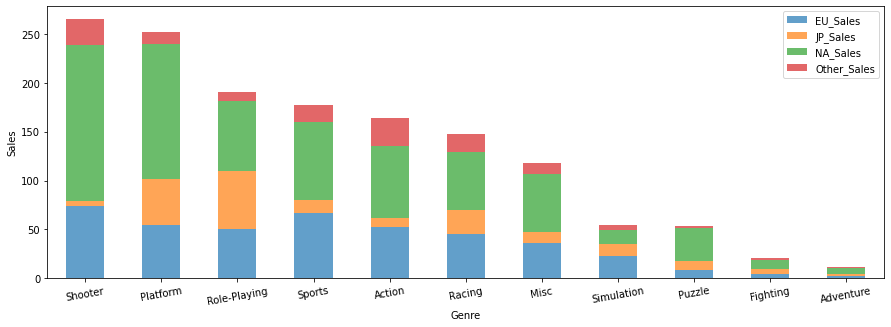

In [66]:
#Genre & Sales
topgr=top_gr.drop('Total',axis=1)
ax=topgr.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

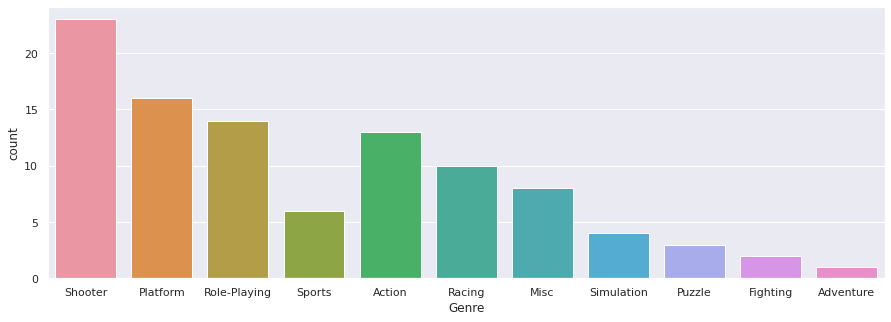

In [67]:
#Genre Count
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data=top,x='Genre',order=top_gr.index);

- 상위 100개 게임의 장르 분석 결과, Shooter가 가장 많았고 판매 금액도 높다. 뒤이어 Platform, Role-Playing 순이며 Sports의 경우 수 대비 판매량이 많다.

1-2) 플랫폼별

In [68]:
#Platform in top 100 games
top_pf=pd.pivot_table(top,index=['Platform'],aggfunc='sum').drop('Year',axis=1)
top_pf=top_pf.sort_values(by='Total',ascending=False)

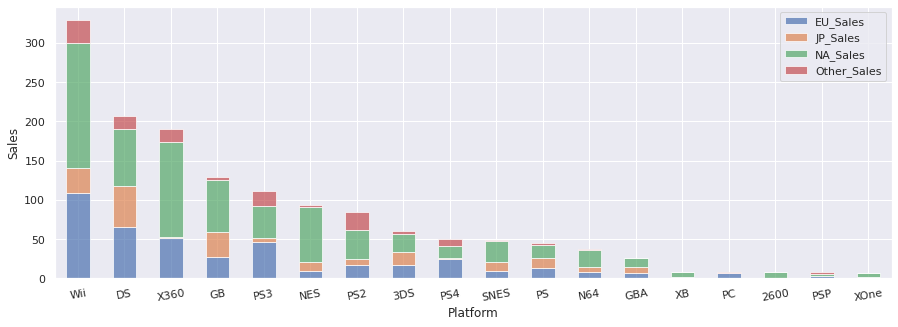

In [69]:
#Platform & Sales
toppf=top_pf.drop('Total',axis=1)
ax=toppf.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

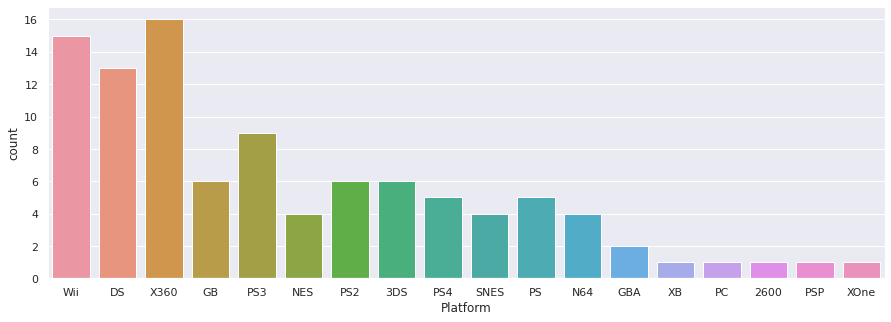

In [70]:
#Platform Count
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(data=top,x='Platform',order=top_pf.index);

- 상위 100개 게임의 플랫폼 분석 결과, Wii가 가장 많은 플랫폼은 아니지만 판매 금액이 가장 높았고, X360의 경우 가장 다수이지만 판매 금액은 3위에 머물렀다.

1-3) 개발사별

In [71]:
#Publisher in top 100 games
top_pb=pd.pivot_table(top,index=['Publisher'],aggfunc='sum').drop('Year',axis=1)
top_pb=top_pb.sort_values(by='Total',ascending=False)

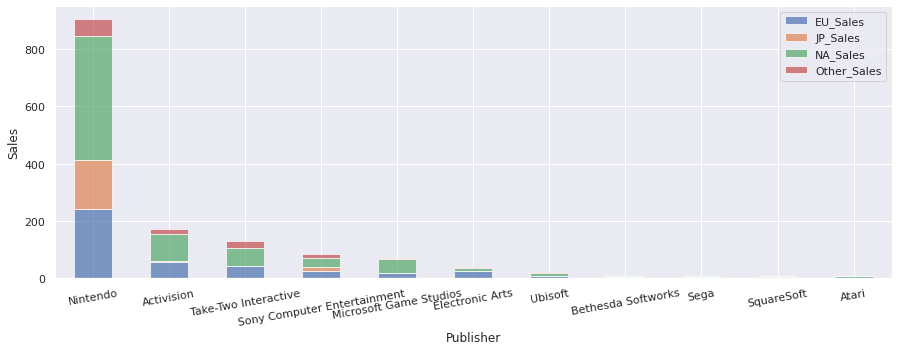

In [72]:
#Publisher & Sales
toppb=top_pb.drop('Total',axis=1)
ax=toppb.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

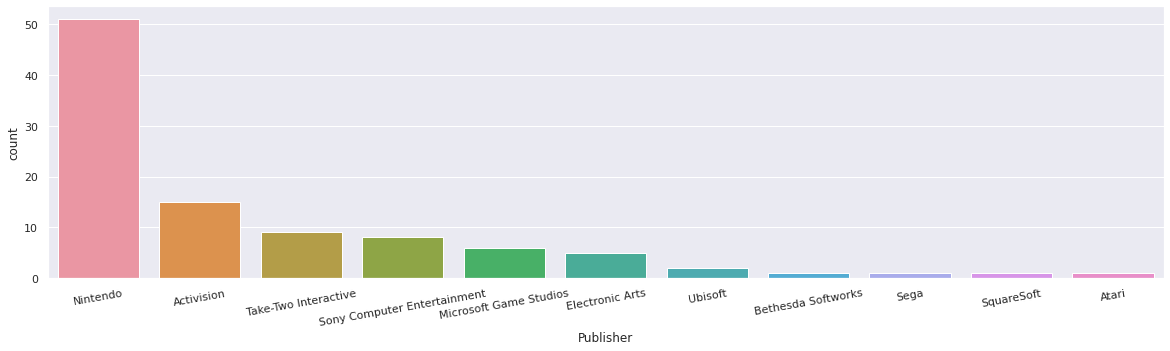

In [73]:
#Publisher Count
sns.set(rc={'figure.figsize':(20,5)})
g=sns.countplot(data=top,x='Publisher',order=top_pb.index)
plt.xticks(rotation=10);

- 상위 100개 게임의 개발사 분석 결과, Nintendo가 압도적으로 높은 판매량과 많은 수를 차지하고 있다.

1-4) 연도별

In [74]:
#Year in top 100 games
top_yrr=pd.pivot_table(top,index=['Year'],aggfunc='sum')
#top_yr=top_yr.sort_values(by='Total',ascending=False)
top_yrr.head(3)

,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Total
Year,,,,,
1982,0.45,0.00,7.28,0.08,7.81
1984,0.63,0.28,26.93,0.47,28.31
1985,3.58,6.81,29.08,0.77,40.24


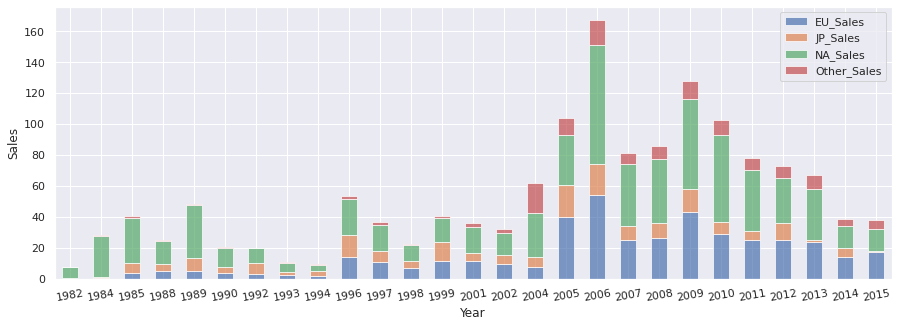

In [75]:
#Year & Sales
topyrr=top_yrr.drop('Total',axis=1)
ax=topyrr.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

In [76]:
#판매금액 급증 했던 2006년 출시된 게임(판매금액순)
data[data['Year'].isin([2006])].sort_values(by='Total',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
2909,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000
6938,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,2000
3015,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01,2000
10556,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35,2000
1036,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.32,2000


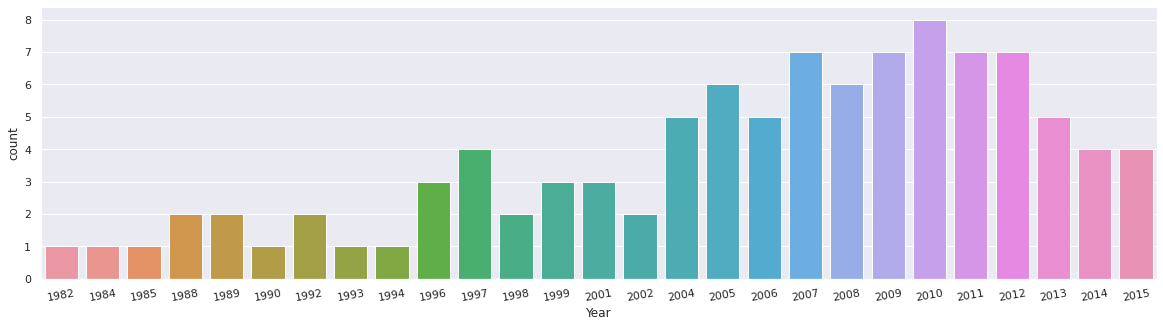

In [77]:
#Year Count
sns.set(rc={'figure.figsize':(20,5)})
g=sns.countplot(data=top,x='Year')
plt.xticks(rotation=10);

- Top 100 게임 중 1980년대와 1990년대 출시된 게임

In [78]:
#판매금액순
condition1=(top['Year']<2000)
df_1900=top[condition1]
df_1900.sort_values(by='Total',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,1990
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,1980
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09,1990


In [79]:
#출시연도순
df_1900.sort_values(by='Year').head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
87,Pac-Man,2600,1982,Puzzle,Atari,7.28,0.45,0.00,0.08,7.81,1980
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,1980
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980
22,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28,1980
94,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,1980


In [80]:
df_1900.shape #1980&1990 24개 in top 100

(24, 11)

- 2004년 이후로 출시된 게임의 수도 많고, 판매 금액도 높다. 그러나 Top 100의 24%는 1980년, 1990년대 고전 게임들이 차지하고 있다.

###2.3.2 게임 개발사와 장르는 연관이 있을까?

In [81]:
#Publisher & Genre 교차표
pg=top[['Publisher','Platform','Genre','Total','Year_N']]
xi=pd.crosstab(pg.Publisher,pg.Genre)
xi.head(3)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports
Publisher,,,,,,,,,,,
Activision,0,0,0,0,0,0,0,0,15,0,0
Atari,0,0,0,0,0,1,0,0,0,0,0
Bethesda Softworks,0,0,0,0,0,0,0,1,0,0,0


###1) 통계적 분석
**가설설정**
- Ho : 게임 개발사와 장르는 연관이 없다.

- Ha : 게임 개발사와 장르는 연관이 있다.

In [82]:
#two sample chi-squared test
from scipy.stats import chi2_contingency
chi2_contingency(xi)

(262.8525333628435,
 1.4230728699359674e-16,
 100,
 array([[1.950e+00, 1.500e-01, 3.000e-01, 1.200e+00, 2.400e+00, 4.500e-01,
         1.500e+00, 2.100e+00, 3.450e+00, 6.000e-01, 9.000e-01],
        [1.300e-01, 1.000e-02, 2.000e-02, 8.000e-02, 1.600e-01, 3.000e-02,
         1.000e-01, 1.400e-01, 2.300e-01, 4.000e-02, 6.000e-02],
        [1.300e-01, 1.000e-02, 2.000e-02, 8.000e-02, 1.600e-01, 3.000e-02,
         1.000e-01, 1.400e-01, 2.300e-01, 4.000e-02, 6.000e-02],
        [6.500e-01, 5.000e-02, 1.000e-01, 4.000e-01, 8.000e-01, 1.500e-01,
         5.000e-01, 7.000e-01, 1.150e+00, 2.000e-01, 3.000e-01],
        [7.800e-01, 6.000e-02, 1.200e-01, 4.800e-01, 9.600e-01, 1.800e-01,
         6.000e-01, 8.400e-01, 1.380e+00, 2.400e-01, 3.600e-01],
        [6.630e+00, 5.100e-01, 1.020e+00, 4.080e+00, 8.160e+00, 1.530e+00,
         5.100e+00, 7.140e+00, 1.173e+01, 2.040e+00, 3.060e+00],
        [1.300e-01, 1.000e-02, 2.000e-02, 8.000e-02, 1.600e-01, 3.000e-02,
         1.000e-01, 1.400e-01, 2.3

>카이제곱검정결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 :  게임 개발사와 장르는 연관이 있다.

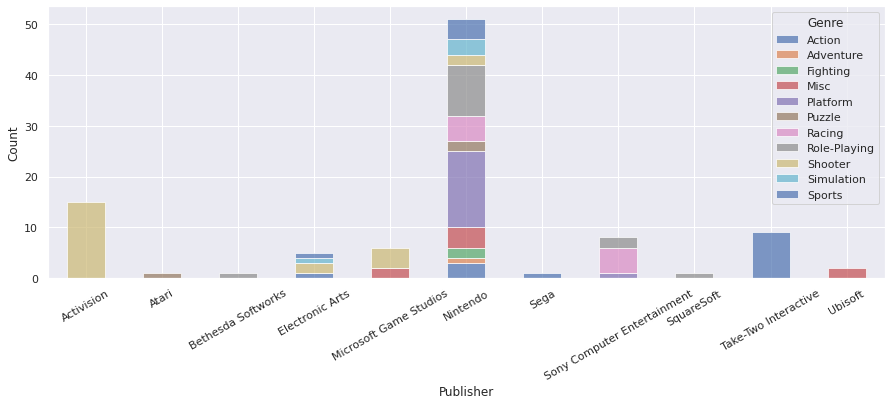

In [83]:
#Publisher & Genre 시각화
ax=xi.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.xticks(rotation=30)
plt.show()

###2.3.3 게임 개발사와 플랫폼은 연관이 있을까?

###1) 통계적 분석
**가설설정**
- Ho : 게임 개발사와 플랫폼은 연관이 없다.

- Ha : 게임 개발사와 플랫폼은 연관이 있다.

In [84]:
#two sample chi-squared test
xii=pd.crosstab(pg.Publisher,pg.Platform)
chi2_contingency(xii)

(372.5147966594045,
 3.432826877588761e-17,
 170,
 array([[0.15, 0.9 , 1.95, 0.9 , 0.3 , 0.6 , 0.6 , 0.15, 0.75, 0.9 , 1.35,
         0.75, 0.15, 0.6 , 2.25, 2.4 , 0.15, 0.15],
        [0.01, 0.06, 0.13, 0.06, 0.02, 0.04, 0.04, 0.01, 0.05, 0.06, 0.09,
         0.05, 0.01, 0.04, 0.15, 0.16, 0.01, 0.01],
        [0.01, 0.06, 0.13, 0.06, 0.02, 0.04, 0.04, 0.01, 0.05, 0.06, 0.09,
         0.05, 0.01, 0.04, 0.15, 0.16, 0.01, 0.01],
        [0.05, 0.3 , 0.65, 0.3 , 0.1 , 0.2 , 0.2 , 0.05, 0.25, 0.3 , 0.45,
         0.25, 0.05, 0.2 , 0.75, 0.8 , 0.05, 0.05],
        [0.06, 0.36, 0.78, 0.36, 0.12, 0.24, 0.24, 0.06, 0.3 , 0.36, 0.54,
         0.3 , 0.06, 0.24, 0.9 , 0.96, 0.06, 0.06],
        [0.51, 3.06, 6.63, 3.06, 1.02, 2.04, 2.04, 0.51, 2.55, 3.06, 4.59,
         2.55, 0.51, 2.04, 7.65, 8.16, 0.51, 0.51],
        [0.01, 0.06, 0.13, 0.06, 0.02, 0.04, 0.04, 0.01, 0.05, 0.06, 0.09,
         0.05, 0.01, 0.04, 0.15, 0.16, 0.01, 0.01],
        [0.08, 0.48, 1.04, 0.48, 0.16, 0.32, 0.32, 0.08, 0.4 

>카이제곱검정결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 :  게임 개발사와 플랫폼은 연관이 있다.

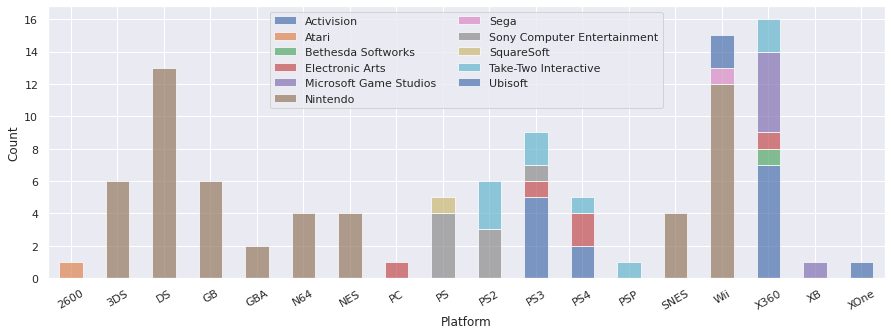

In [85]:
#Publisher & Genre 시각화
ax=xii.T.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.xticks(rotation=30)
plt.legend(loc='upper center',ncol=2)
plt.show()

###2.3.4 게임 플랫폼과 장르는 연관이 있을까?

###1) 통계적 분석
**가설설정**
- Ho : 게임 플랫폼과 장르는 연관이 없다.

- Ha : 게임 플랫폼과 장르는 연관이 있다.

In [86]:
#two sample chi-squared test
xiii=pd.crosstab(pg.Genre,pg.Platform)
chi2_contingency(xiii)

(263.15863546988135,
 5.951488548530414e-06,
 170,
 array([[0.13, 0.78, 1.69, 0.78, 0.26, 0.52, 0.52, 0.13, 0.65, 0.78, 1.17,
         0.65, 0.13, 0.52, 1.95, 2.08, 0.13, 0.13],
        [0.01, 0.06, 0.13, 0.06, 0.02, 0.04, 0.04, 0.01, 0.05, 0.06, 0.09,
         0.05, 0.01, 0.04, 0.15, 0.16, 0.01, 0.01],
        [0.02, 0.12, 0.26, 0.12, 0.04, 0.08, 0.08, 0.02, 0.1 , 0.12, 0.18,
         0.1 , 0.02, 0.08, 0.3 , 0.32, 0.02, 0.02],
        [0.08, 0.48, 1.04, 0.48, 0.16, 0.32, 0.32, 0.08, 0.4 , 0.48, 0.72,
         0.4 , 0.08, 0.32, 1.2 , 1.28, 0.08, 0.08],
        [0.16, 0.96, 2.08, 0.96, 0.32, 0.64, 0.64, 0.16, 0.8 , 0.96, 1.44,
         0.8 , 0.16, 0.64, 2.4 , 2.56, 0.16, 0.16],
        [0.03, 0.18, 0.39, 0.18, 0.06, 0.12, 0.12, 0.03, 0.15, 0.18, 0.27,
         0.15, 0.03, 0.12, 0.45, 0.48, 0.03, 0.03],
        [0.1 , 0.6 , 1.3 , 0.6 , 0.2 , 0.4 , 0.4 , 0.1 , 0.5 , 0.6 , 0.9 ,
         0.5 , 0.1 , 0.4 , 1.5 , 1.6 , 0.1 , 0.1 ],
        [0.14, 0.84, 1.82, 0.84, 0.28, 0.56, 0.56, 0.14, 0.7

>카이제곱검정결과 p-value가 alpha level(0.05)보다 작으므로 귀무가설을 기각한다.

###결론 :  게임 플랫폼과 장르는 연관이 있다.

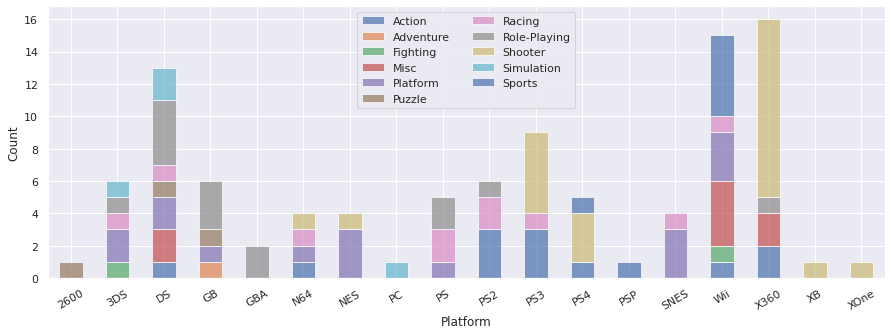

In [87]:
#Platform & Genre 시각화
ax=xiii.T.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.xticks(rotation=30)
plt.legend(loc='upper center',ncol=2)
plt.show()

###2.3.5 Top 100 게임 중 2010년 이후 출시 게임 분석

In [88]:
#top 100 중 2010년 이후 출시작
condition=(top['Year']>=2010)
df_2010=top[condition]
df_2010.sort_values(by='Total',ascending=False).head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,2010
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,2010
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2010
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,2010
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2010


In [89]:
#플랫폼 통합 Total sales순
df_2010.groupby('Name').sum().sort_values(by='Total',ascending=False).head(5)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
Name,,,,,,
Grand Theft Auto V,6040,20.44,20.39,1.39,7.54,49.76
Call of Duty: Modern Warfare 3,4022,14.57,10.10,0.62,2.94,28.23
Call of Duty: Black Ops II,4024,13.24,10.18,0.72,3.64,27.78
Call of Duty: Black Ops,4020,15.65,8.17,0.59,2.96,27.37
Kinect Adventures!,2010,14.97,4.94,0.24,1.67,21.82


###1) 2010년 이후 게임 개발사, 플랫폼, 장르 시각화

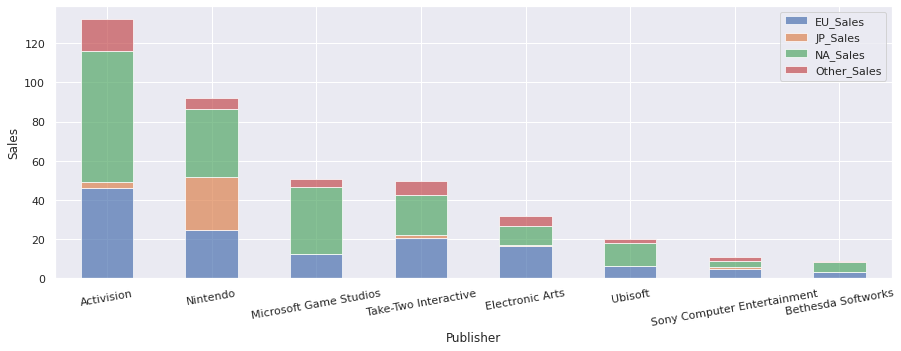

In [90]:
#Publisher by total sales in 2010s
df_pb=pd.pivot_table(df_2010,index=['Publisher'],aggfunc='sum').drop('Year',axis=1)
df_pb=df_pb.sort_values(by='Total',ascending=False)
dfpb=df_pb.drop('Total',axis=1)
ax=dfpb.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

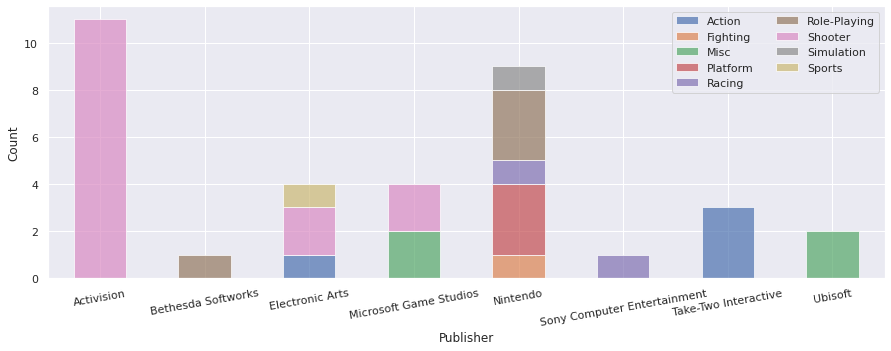

In [91]:
#Publisher & Genre in 2010s
t2=pd.crosstab(df_2010.Publisher,df_2010.Genre)
ax=t2.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.legend(ncol=2)
plt.xticks(rotation=10)
plt.show()

In [92]:
#Activision 대표 게임
df_2010[df_2010['Publisher'].isin(['Activision'])].sort_values(by='Total',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,2010
30,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,2010
32,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,2010
33,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04,2010
34,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74,2010
36,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47,2010
39,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73,2010
60,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72,2.63,0.04,0.82,10.21,2010
66,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,4.09,3.73,0.38,1.38,9.58,2010
91,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.61,2010


In [93]:
#Nintendo 대표 게임
df_2010[df_2010['Publisher'].isin(['Nintendo'])].sort_values(by='Total',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
26,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,2010
41,Mario Kart 7,3DS,2011,Racing,Nintendo,4.74,3.91,2.67,0.89,12.21,2010
48,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33,2010
52,Super Mario 3D Land,3DS,2011,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79,2010
63,New Super Mario Bros. 2,3DS,2012,Platform,Nintendo,3.66,3.07,2.47,0.63,9.83,2010
72,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01,2.32,4.36,0.41,9.10,2010
79,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91,1.86,3.14,0.43,8.34,2010
89,Super Mario Galaxy 2,Wii,2010,Platform,Nintendo,3.66,2.42,0.98,0.64,7.70,2010
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44,2010


In [94]:
#Microsoft Game Studios 대표 게임
df_2010[df_2010['Publisher'].isin(['Microsoft Game Studios'])].sort_values(by='Total',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
15,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,2010
62,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.87,2010
64,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63,2.36,0.04,0.73,9.76,2010
71,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20,2010


In [95]:
#Take-Two Interactive 대표 게임
df_2010[df_2010['Publisher'].isin(['Take-Two Interactive'])].sort_values(by='Total',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
16,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39,2010
23,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,2010
43,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99,2010


In [96]:
#Ubisoft대표 게임
df_2010[df_2010['Publisher'].isin(['Ubisoft'])].sort_values(by='Total',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total,Year_N
59,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.27,2010
67,Just Dance 2,Wii,2010,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52,2010


- 2010년대에 Activision에서 출시한 Call of Duty 시리즈가 인기를 끌며 높은 판매량을 이끌고 있으며, 닌텐도는 포켓몬과 슈퍼마리오 시리즈로 굳건히 2위 자리를 지키고 있다. 마이크로 소프트사나 Take-two Interactive의 성장도 눈에 띈다.

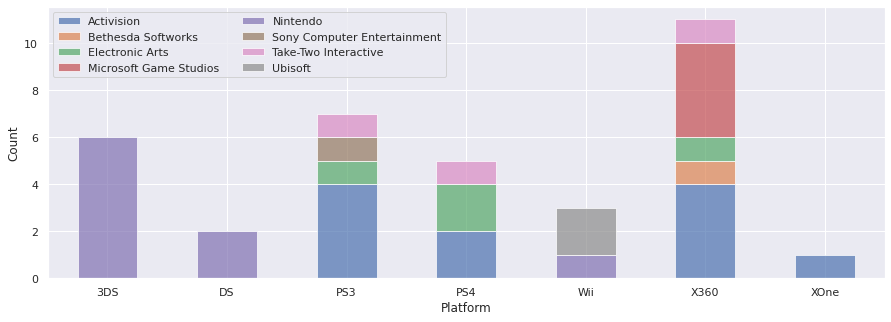

In [97]:
#Platform & Publisher in 2010s
t=pd.crosstab(df_2010.Platform,df_2010.Publisher)
ax=t.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.legend(ncol=2)
plt.xticks(rotation=0)
plt.show()

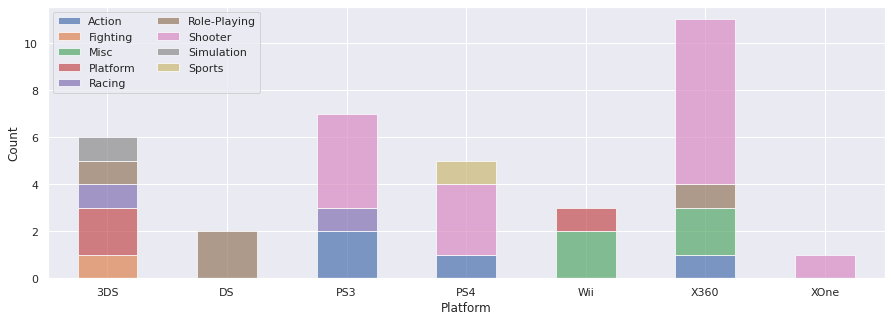

In [98]:
#Platform & Genre in 2010s
t1=pd.crosstab(df_2010.Platform,df_2010.Genre)
ax=t1.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.legend(ncol=2)
plt.xticks(rotation=0)
plt.show()

- X360과 PS의 플랫폼이 두드러지고, 슈팅 게임이 가장 높은 비율을 차지한다. 반면 닌텐도사의 3DS와 Wii는 다양한 플랫폼과 게임 장르를 갖추고 있다.

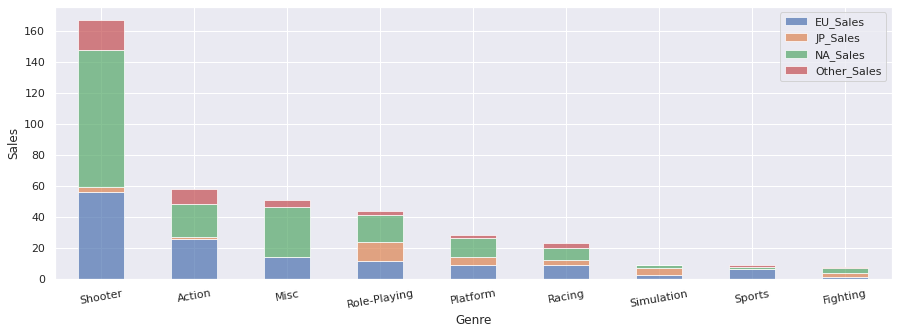

In [99]:
#Genre & Sales
df_gr=pd.pivot_table(df_2010,index=['Genre'],aggfunc='sum').drop('Year',axis=1)
df_gr=df_gr.sort_values(by='Total',ascending=False)
dfgr=df_gr.drop('Total',axis=1)
ax=dfgr.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
plt.xticks(rotation=10)
ax.set_ylabel('Sales')
plt.show()

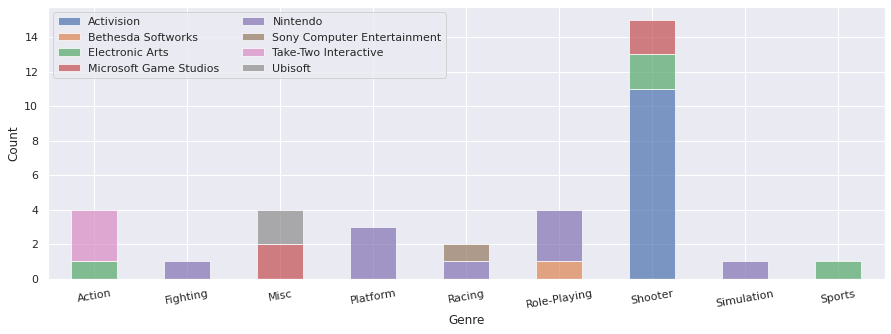

In [100]:
ax=t2.T.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.legend(ncol=2)
plt.xticks(rotation=10)
plt.show()

- Shooter 장르 게임이 압도적이다.

##2.3.6 중복 플랫폼 출시 게임 분석

In [101]:
#동일한 이름, 상이한 플랫폼(전체)
from collections import Counter
result1=Counter(list(data['Name']))
print(result1)

Counter({'Need for Speed: Most Wanted': 12, 'FIFA 14': 9, 'LEGO Marvel Super Heroes': 9, 'Ratatouille': 9, 'Madden NFL 07': 8, 'FIFA 15': 8, 'The LEGO Movie Videogame': 8, 'Terraria': 8, 'LEGO Star Wars II: The Original Trilogy': 8, 'Cars': 8, 'LEGO Jurassic World': 8, 'Lego Batman 3: Beyond Gotham': 8, 'Monopoly': 8, 'Madden NFL 08': 8, 'LEGO The Hobbit': 8, 'FIFA Soccer 13': 8, 'Angry Birds Star Wars': 8, 'The Sims 2': 7, "Harry Potter and the Sorcerer's Stone": 7, 'The Amazing Spider-Man 2 (2014)': 7, 'Harry Potter and the Half-Blood Prince': 7, 'Need For Speed: Undercover': 7, 'Wall-E': 7, 'FIFA Soccer 08': 7, 'LEGO Pirates of the Caribbean: The Video Game': 7, 'Skylanders SWAP Force': 7, 'Skylanders: SuperChargers': 7, "LEGO Marvel's Avengers": 7, 'LEGO The Lord of the Rings': 7, 'Star Wars The Clone Wars: Republic Heroes': 7, 'Pro Evolution Soccer 2012': 7, 'FIFA Soccer 10': 7, 'Need for Speed: ProStreet': 7, 'FIFA 12': 7, "Surf's Up": 7, 'NBA Jam': 7, 'Skylanders: Trap Team': 7,

In [102]:
#Top 100 중 플랫폼 중복 출시 개수 = 10
top.groupby('Name').sum().sort_values(by='Total',ascending=False).shape

(90, 6)

In [103]:
fifa=data.loc[data['Name'].str.contains('FIFA 14')].reset_index()[['Platform','Total']]
lego=data.loc[data['Name'].str.contains('LEGO Marvel Super Heroes')].reset_index()[['Platform','Total']]

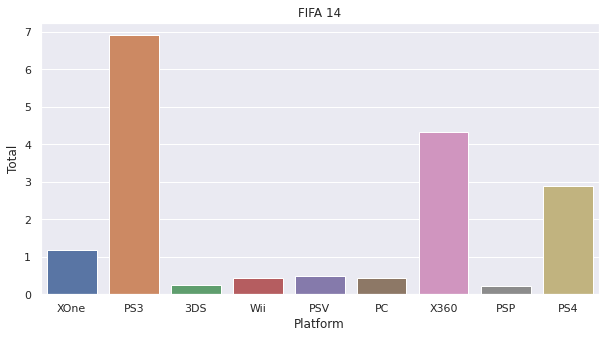

In [104]:
#Fifa14 Platforms
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Platform',y='Total',data=fifa);
plt.title('FIFA 14');

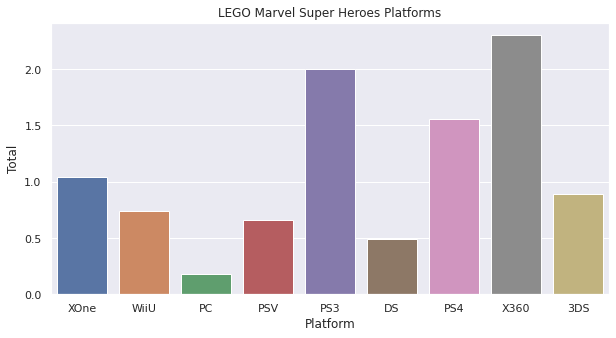

In [105]:
#LEGO Marvel Super Heroes Platforms
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='Platform',y='Total',data=lego)
plt.title('LEGO Marvel Super Heroes Platforms');

- 다양한 플랫폼을 이용한다면 판매 채널 확대가 가능하다.

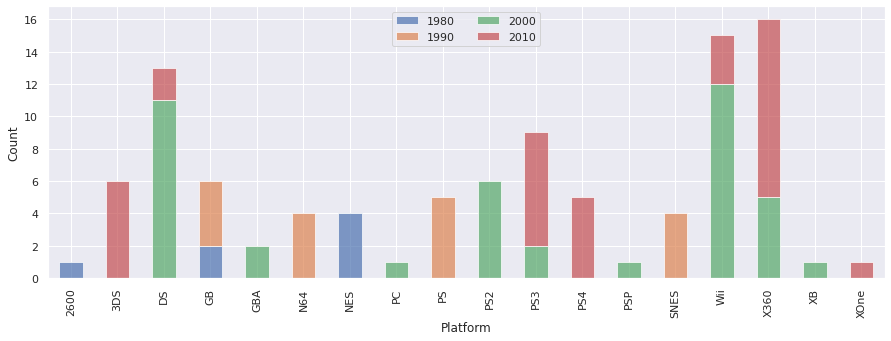

In [106]:
q33=pd.crosstab(top.Platform,top.Year_N)
ax=q33.plot(kind='bar',figsize=(15,5),stacked=True,alpha=0.7)
ax.set_ylabel('Count')
plt.legend(loc='upper center',ncol=2)
plt.show()

#conclusion
>다음 분기에 어떤 게임을 설계해야 할까?


###1. 북미지역 판매량이 전 세계 판매량에 가장 큰 영향을 주므로, 북미지역을 타겟으로 한다.

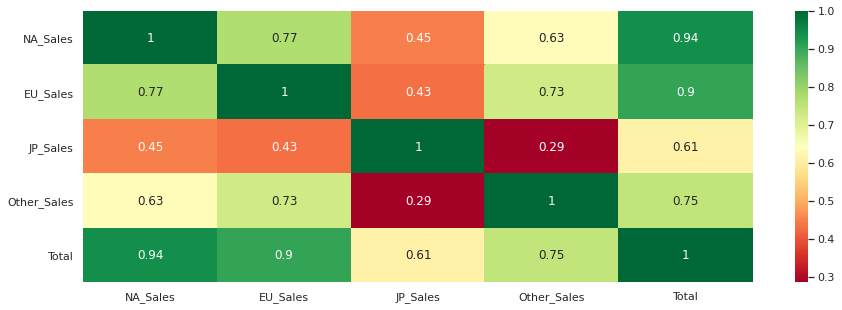

In [107]:
#전체 게임 데이터 상관분석
plt.figure(figsize=(15,5))
sns.heatmap(data_corr,annot=True,cmap="RdYlGn")
plt.show()

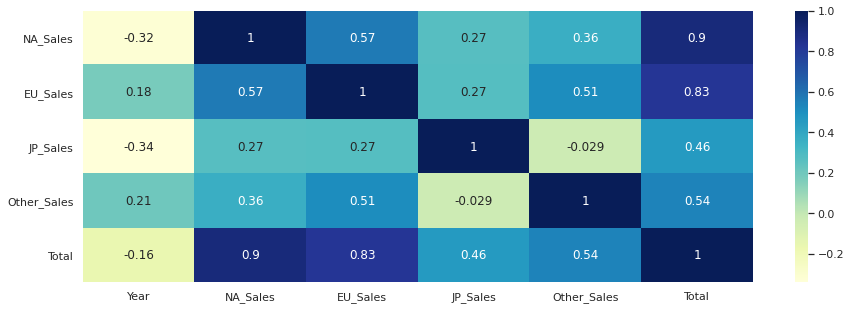

In [108]:
#Top 100 게임 상관분석
top_corr=top.corr().drop('Year',axis=0)
plt.figure(figsize=(15,5))
sns.heatmap(top_corr,annot=True,cmap="YlGnBu")
plt.show()

###2. 다양한 게임 플랫폼에 출시할 수 있는 게임을 설계한다.
-2.3.6 중복 플랫폼 출시 게임 분석 참고

###3. 개발하는 게임 장르별 연관있는 개발사와 플랫폼을 선택한다.
-2.3.2~2.3.4 게임 장르, 개발사, 플랫폼 연관 분석 참고
- Shooter, Action 장르 : 추천 플랫폼 PS, X360/ 추천 개발사 Activision, Take-Two Interactive
- Platform 장르 : 추천 플랫폼 DS 시리즈, Wii/ 추천 개발사  Nintendo
- Sports 장르 : 추천 플랫폼 Wii, PS/ 추천 개발사는 Nintendo


###4. 다음 분기 설계시 참고할 사항
-2.3.5 Top 100 게임 중 2010년 이후 출시 게임 분석 참고
- 매니아층 (일명, 덕후) 양성을 목표로 하고, 시리즈물 제작으로 지속적인 판매 증진 유도
- 이미 유행하고 있는 트렌디한 게임을 출시하고 싶다면 2010년 이후 출시된 게임 중 인기있는 Shooter 장르, Action 장르가 추천
>추천 플랫폼 PS, X360/ 추천 개발사 Activision, Take-Two Interactive
- 앞으로 유행할 게임은 거대 자본 Microsoft Game Studios와 Just Dance로 성장중인 Ubisoft의 Misc 장르
>추천 플랫폼 Microsoft Game studios, Ubisoft / 추천 개발사 X360, Wii
- 전 세계적으로 무난하게 있기를 끌고 있는 Role-Playing 장르 추천
>추천 플랫폼 DS 시리즈 / 추천 개발사 Nintendo